In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
## Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data:
olist_customers = pd.read_csv("./dataset/olist_customers_dataset.csv")
olist_geoloc = pd.read_csv("./dataset/olist_geolocation_dataset.csv")
olist_items = pd.read_csv("./dataset/olist_order_items_dataset.csv")
olist_payments = pd.read_csv("./dataset/olist_order_payments_dataset.csv")
olist_reviews = pd.read_csv("./dataset/olist_order_reviews_dataset.csv")
olist_orders = pd.read_csv("./dataset/olist_orders_dataset.csv")
olist_products = pd.read_csv("./dataset/olist_products_dataset.csv")
olist_sellers = pd.read_csv("./dataset/olist_sellers_dataset.csv")
olist_products_name_translation = pd.read_csv("./dataset/product_category_name_translation.csv")

In [4]:
df_merge= pd.merge(olist_customers, olist_orders, on="customer_id")
df_merge= df_merge.merge(olist_reviews, on="order_id")
df_merge= df_merge.merge(olist_items, on="order_id")
df_merge= df_merge.merge(olist_products, on="product_id")
df_merge= df_merge.merge(olist_payments, on="order_id")
df_merge= df_merge.merge(olist_sellers, on='seller_id')
df_merge= df_merge.merge(olist_products_name_translation, on='product_category_name')
df_merge.shape

(115609, 40)

In [5]:
# customer_id 'SP' 경우만 필터링 

df_merge_sp = df_merge[df_merge['customer_state']=='SP']

In [6]:
df_merge_sp.head()

customer_id                customer_unique_id  \
0   06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
22  8bf4f9552bc2db14d6195bbbb5131941  b428f59c73c1bbeb3584744b4570654b   
33  9202f01b2ebd095e340abd57e02b65e6  7fcf7dc77013a88b9eef97c288b3eb8d   
36  15359860c7341b2f6b12259d83c2e697  52d8a619dff23c2985434b25e9862ff8   
40  645d4fd3f4546d7c9592576665711186  661ada8f1f0f348790c6b9ce57d51f55   

    customer_zip_code_prefix customer_city customer_state  \
0                      14409        franca             SP   
22                      3728     sao paulo             SP   
33                     11701  praia grande             SP   
36                     18609      botucatu             SP   
40                     17521       marilia             SP   

                            order_id order_status order_purchase_timestamp  \
0   00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
22  7ebc5c60f532934ce55b3025203ebe5b    delivered      2017-06-24 08:59:47   
33  4819cd593b17ce6f5757d395b2597a9d    delivered      2017-06-02 11:06:09   
36  cec04b13070b06e2f7326de94287d60d    delivered      2017-04-24 12:16:12   
40  6b5c76c2c9615b42e0c2b7efb11b60d7    delivered      2018-04-03 21:24:29   

      order_approved_at order_delivered_carrier_date  ... product_height_cm  \
0   2017-05-16 15:22:12          2017-05-23 10:47:57  ...              64.0   
22  2017-06-27 03:45:30          2017-06-29 17:37:56  ...              64.0   
33  2017-06-02 11:23:00          2017-06-08 14:58:56  ...              64.0   
36  2017-04-25 06:35:40          2017-05-15 15:45:56  ...              64.0   
40  2018-04-03 21:35:21          2018-04-17 22:38:18  ...              64.0   

   product_width_cm payment_sequential  payment_type payment_installments  \
0              31.0                  1   credit_card                    2   
22             31.0                  1        boleto                    1   
33             31.0                  1   credit_card                    5   
36             31.0                  1        boleto                    1   
40             31.0                  1   credit_card                    2   

   payment_value seller_zip_code_prefix      seller_city  seller_state  \
0         146.87                   8577  itaquaquecetuba            SP   
22        148.45                   8577  itaquaquecetuba            SP   
33        143.58                   8577  itaquaquecetuba            SP   
36        136.47                   8577  itaquaquecetuba            SP   
40        140.53                   8577  itaquaquecetuba            SP   

   product_category_name_english  
0               office_furniture  
22              office_furniture  
33              office_furniture  
36              office_furniture  
40              office_furniture  

[5 rows x 40 columns]

In [7]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [8]:
df_merge_sp[time_columns]=df_merge_sp[time_columns].apply(pd.to_datetime)

In [9]:
#  order_purchase_timestamp 년, 월, 주, 일, 시간 으로 나누기

# df_merge_sp['weekdaay']=df_merge_sp['order_purchase_timestamp'].dt.weekday_name
df_merge_sp['year']=df_merge_sp['order_purchase_timestamp'].dt.year
df_merge_sp['monthday']=df_merge_sp['order_purchase_timestamp'].dt.day
df_merge_sp['weekday'] = df_merge_sp['order_purchase_timestamp'].dt.weekday
df_merge_sp['month']=df_merge_sp['order_purchase_timestamp'].dt.month
df_merge_sp['hour']=df_merge_sp['order_purchase_timestamp'].dt.hour

In [10]:
# total_price 열 생성 

df_merge_sp['total_price'] = df_merge_sp['price'] + df_merge_sp['freight_value']

In [11]:
df_merge_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48797 entries, 0 to 115606
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    48797 non-null  object        
 1   customer_unique_id             48797 non-null  object        
 2   customer_zip_code_prefix       48797 non-null  int64         
 3   customer_city                  48797 non-null  object        
 4   customer_state                 48797 non-null  object        
 5   order_id                       48797 non-null  object        
 6   order_status                   48797 non-null  object        
 7   order_purchase_timestamp       48797 non-null  datetime64[ns]
 8   order_approved_at              48793 non-null  datetime64[ns]
 9   order_delivered_carrier_date   48169 non-null  datetime64[ns]
 10  order_delivered_customer_date  47817 non-null  datetime64[ns]
 11  order_estimate

# 고객 Segmentation 방법 1

# Recency

### Order 일자 Recency(최근일)를 기준으로 등급화

 - 고객의 마지막 구매가 얼마나 최근이었는지 
 - 최근에 구매한 고객은 여전히 제품을 염두에 두고 제품을 다시 구매할 가능성이 큼

In [12]:
# recency
recency_df= pd.DataFrame(df_merge_sp.groupby(by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].max())
recency_df

customer_unique_id order_purchase_timestamp
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27
2      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42
3      0004bd2a26a76fe21f786e4fbd80607f      2018-04-05 19:33:16
4      00050ab1314c0e55a6ca13cf7181fecf      2018-04-20 12:57:23
...                                 ...                      ...
39187  ffedff0547d809c90c05c2691c51f9b7      2017-03-30 14:50:26
39188  ffee94d548cef05b146d825a7648dab4      2018-07-27 22:40:35
39189  fff22793223fe80c97a8fd02ac5c6295      2018-06-26 11:01:47
39190  fff699c184bcc967d62fa2c6171765f7      2017-09-01 17:06:54
39191  fff96bc586f78b1f070da28c4977e810      2018-08-15 10:26:57

[39192 rows x 2 columns]

### 주문 일자의 가장 마지막 일자 기준 + 2일을 분석하는 Today 당일로 설정 
- df_merge['order_purchase_timestamp'].max() + dt.timedelta(days=2)

In [13]:
from datetime import datetime
today = df_merge_sp['order_purchase_timestamp'].max() + dt.timedelta(days=2)
today = '2018-08-29'
date_today = datetime.strptime(today, '%Y-%m-%d')
date_today

datetime.datetime(2018, 8, 29, 0, 0)

### Today - 주문 일자 산출 과정통해서 두 변수의 차이 계산

In [14]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (date_today - x).days)
recency_df

customer_unique_id order_purchase_timestamp  Recency
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      110
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      113
2      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      287
3      0004bd2a26a76fe21f786e4fbd80607f      2018-04-05 19:33:16      145
4      00050ab1314c0e55a6ca13cf7181fecf      2018-04-20 12:57:23      130
...                                 ...                      ...      ...
39187  ffedff0547d809c90c05c2691c51f9b7      2017-03-30 14:50:26      516
39188  ffee94d548cef05b146d825a7648dab4      2018-07-27 22:40:35       32
39189  fff22793223fe80c97a8fd02ac5c6295      2018-06-26 11:01:47       63
39190  fff699c184bcc967d62fa2c6171765f7      2017-09-01 17:06:54      361
39191  fff96bc586f78b1f070da28c4977e810      2018-08-15 10:26:57       13

[39192 rows x 3 columns]

In [15]:
df_merge_sp_merged = df_merge_sp.merge(recency_df, on = 'customer_unique_id')
df_merge_sp_merged

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      8bf4f9552bc2db14d6195bbbb5131941  b428f59c73c1bbeb3584744b4570654b   
2      9202f01b2ebd095e340abd57e02b65e6  7fcf7dc77013a88b9eef97c288b3eb8d   
3      15359860c7341b2f6b12259d83c2e697  52d8a619dff23c2985434b25e9862ff8   
4      645d4fd3f4546d7c9592576665711186  661ada8f1f0f348790c6b9ce57d51f55   
...                                 ...                               ...   
48792  9d9cfbce48737214f23bf294daf3c6f7  6c861f46d09c560422f6ba6b33c017fe   
48793  dd3926dff45a3459c4bdac0b58a2a0bf  923bbadc05e0de833a6ea5e3d546c4d0   
48794  dd3926dff45a3459c4bdac0b58a2a0bf  923bbadc05e0de833a6ea5e3d546c4d0   
48795  406c8e1382162dc6bef214e0c01fc297  9b8844d7cceb1277e6508cce966e4a09   
48796  aa0533eb31ed3be79086f11bb2bec430  a490d5875edefe9bb8f5101ec2f6b56f   

       customer_zip_code_prefix          customer_city customer_state  \
0                         14409                 franca             SP   
1                          3728              sao paulo             SP   
2                         11701           praia grande             SP   
3                         18609               botucatu             SP   
4                         17521                marilia             SP   
...                         ...                    ...            ...   
48792                      9371                   maua             SP   
48793                      5727              sao paulo             SP   
48794                      5727              sao paulo             SP   
48795                      6767        taboao da serra             SP   
48796                     13870  sao joao da boa vista             SP   

                               order_id order_status  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered   
1      7ebc5c60f532934ce55b3025203ebe5b    delivered   
2      4819cd593b17ce6f5757d395b2597a9d    delivered   
3      cec04b13070b06e2f7326de94287d60d    delivered   
4      6b5c76c2c9615b42e0c2b7efb11b60d7    delivered   
...                                 ...          ...   
48792  30b0ea32347476f4b427daf62e09a5bb    delivered   
48793  3821dc9ac1b25bed42324d0885b0a930    delivered   
48794  3821dc9ac1b25bed42324d0885b0a930    delivered   
48795  4cbf1cc60a2d1704a70e11ee8be1510a    delivered   
48796  e22a3e8048469ea68906f666d446c25c    delivered   

      order_purchase_timestamp_x   order_approved_at  \
0            2017-05-16 15:05:35 2017-05-16 15:22:12   
1            2017-06-24 08:59:47 2017-06-27 03:45:30   
2            2017-06-02 11:06:09 2017-06-02 11:23:00   
3            2017-04-24 12:16:12 2017-04-25 06:35:40   
4            2018-04-03 21:24:29 2018-04-03 21:35:21   
...                          ...                 ...   
48792        2017-08-12 19:20:39 2017-08-12 19:30:17   
48793        2018-04-17 21:01:58 2018-04-17 21:15:10   
48794        2018-04-17 21:01:58 2018-04-17 21:15:10   
48795        2018-01-01 17:03:13 2018-01-01 17:11:48   
48796        2017-08-28 09:48:01 2017-08-28 10:05:04   

      order_delivered_carrier_date  ... seller_state  \
0              2017-05-23 10:47:57  ...           SP   
1              2017-06-29 17:37:56  ...           SP   
2              2017-06-08 14:58:56  ...           SP   
3              2017-05-15 15:45:56  ...           SP   
4              2018-04-17 22:38:18  ...           SP   
...                            ...  ...          ...   
48792          2017-08-14 18:26:28  ...           SC   
48793          2018-04-18 18:52:45  ...           SC   
48794          2018-04-18 18:52:45  ...           SC   
48795          2018-01-02 15:58:13  ...           SC   
48796          2017-08-29 11:05:28  ...           SC   

      product_category_name_english  year  monthday weekday month hour  \
0                  office_furniture  2017        16       1     5   15   
1                  office_furniture  2017        24       5

# Frequency

In [16]:
frequency_df = pd.DataFrame(df_merge_sp.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

customer_unique_id  Frequency
0      0000366f3b9a7992bf8c76cfdf3221e2          1
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1
2      0004aac84e0df4da2b147fca70cf8255          1
3      0004bd2a26a76fe21f786e4fbd80607f          1
4      00050ab1314c0e55a6ca13cf7181fecf          1
...                                 ...        ...
39187  ffedff0547d809c90c05c2691c51f9b7          1
39188  ffee94d548cef05b146d825a7648dab4          1
39189  fff22793223fe80c97a8fd02ac5c6295          1
39190  fff699c184bcc967d62fa2c6171765f7          1
39191  fff96bc586f78b1f070da28c4977e810          1

[39192 rows x 2 columns]

In [17]:
frequency_df['Frequency'].value_counts()

1     37977
2      1126
3        74
4         7
5         4
9         1
6         1
7         1
15        1
Name: Frequency, dtype: int64

In [18]:
# # Outliers 확인 

# sns.boxplot(frequency_df['Frequency'])

# Monetary

In [19]:
monetary_df = df_merge_sp.groupby('customer_unique_id', as_index=False)['total_price'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df

customer_unique_id  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2      0004aac84e0df4da2b147fca70cf8255    196.89
3      0004bd2a26a76fe21f786e4fbd80607f    166.98
4      00050ab1314c0e55a6ca13cf7181fecf     35.38
...                                 ...       ...
39187  ffedff0547d809c90c05c2691c51f9b7     32.42
39188  ffee94d548cef05b146d825a7648dab4     35.36
39189  fff22793223fe80c97a8fd02ac5c6295     89.19
39190  fff699c184bcc967d62fa2c6171765f7     55.00
39191  fff96bc586f78b1f070da28c4977e810     63.42

[39192 rows x 2 columns]

In [20]:
# # Outliers 확인 

# sns.boxplot(monetary_df['Monetary'])

In [21]:
# Frequency 와 Monetary에 이상치 확인하여 이상치 제거 

# monetary
# MQ1 = monetary_df.Monetary.quantile(0.05)
# MQ3 = monetary_df.Monetary.quantile(0.95)
# MIQR = MQ3 - MQ1
# monetary_df = monetary_df[(monetary_df.Monetary >= MQ1 - 1.5*MIQR) & (monetary_df.Monetary <= MQ3 + 1.5*MIQR)]

# # frequency
# FQ1 = frequency_df.Frequency.quantile(0.05)
# FQ3 = frequency_df.Frequency.quantile(0.95)
# FIQR = FQ3 - FQ1
# frequency_df = frequency_df[(frequency_df.Frequency >= FQ1 - 1.5*FIQR) & (frequency_df.Frequency <= FQ3 + 1.5*FIQR)]

<AxesSubplot: >

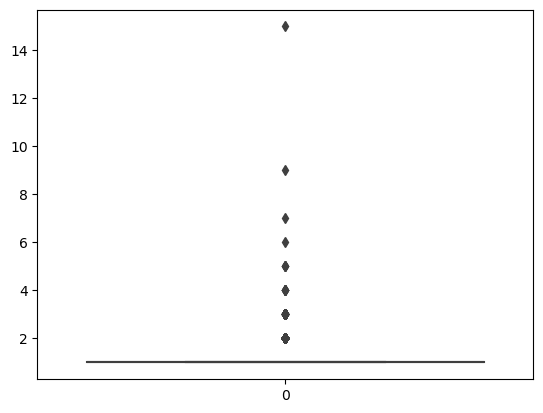

In [22]:
sns.boxplot(frequency_df['Frequency'])

<AxesSubplot: >

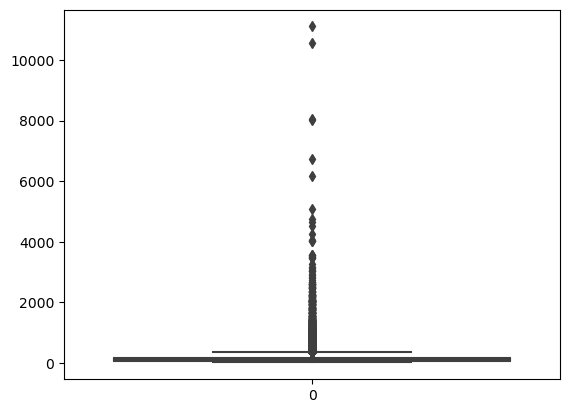

In [23]:
sns.boxplot(monetary_df['Monetary'])

In [24]:
rfm_first = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_final = rfm_first.merge(monetary_df, on='customer_unique_id')
rfm_final

customer_unique_id order_purchase_timestamp  Recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      110   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      113   
2      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      287   
3      0004bd2a26a76fe21f786e4fbd80607f      2018-04-05 19:33:16      145   
4      00050ab1314c0e55a6ca13cf7181fecf      2018-04-20 12:57:23      130   
...                                 ...                      ...      ...   
39187  ffedff0547d809c90c05c2691c51f9b7      2017-03-30 14:50:26      516   
39188  ffee94d548cef05b146d825a7648dab4      2018-07-27 22:40:35       32   
39189  fff22793223fe80c97a8fd02ac5c6295      2018-06-26 11:01:47       63   
39190  fff699c184bcc967d62fa2c6171765f7      2017-09-01 17:06:54      361   
39191  fff96bc586f78b1f070da28c4977e810      2018-08-15 10:26:57       13   

       Frequency  Monetary  
0              1    141.90  
1              1     27.19  
2              1    196.89  
3              1    166.98  
4              1     35.38  
...          ...       ...  
39187          1     32.42  
39188          1     35.36  
39189          1     89.19  
39190          1     55.00  
39191          1     63.42  

[39192 rows x 5 columns]

In [25]:
rfm_final.describe().T

count        mean         std    min     25%     50%     75%  \
Recency    39192.0  225.825628  152.352016  -6.00  104.00  203.00  330.00   
Frequency  39192.0    1.034293    0.215729   1.00    1.00    1.00    1.00   
Monetary   39192.0  155.910855  238.717721  10.07   56.78   98.51  171.11   

               max  
Recency      695.0  
Frequency     15.0  
Monetary   11111.4

In [26]:
rfm_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39192 entries, 0 to 39191
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        39192 non-null  object        
 1   order_purchase_timestamp  39192 non-null  datetime64[ns]
 2   Recency                   39192 non-null  int64         
 3   Frequency                 39192 non-null  int64         
 4   Monetary                  39192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.8+ MB


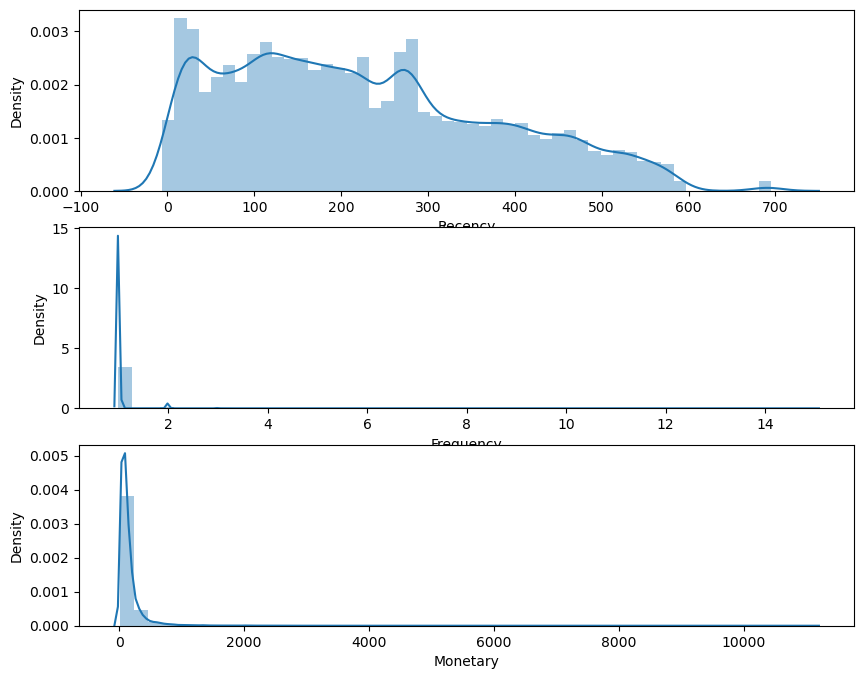

In [27]:
# rfm 시각화 확인하기

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
sns.distplot(rfm_final['Recency'])
plt.subplot(3,1,2)
sns.distplot(rfm_final['Frequency'])
plt.subplot(3,1,3)
sns.distplot(rfm_final['Monetary'])
plt.show();

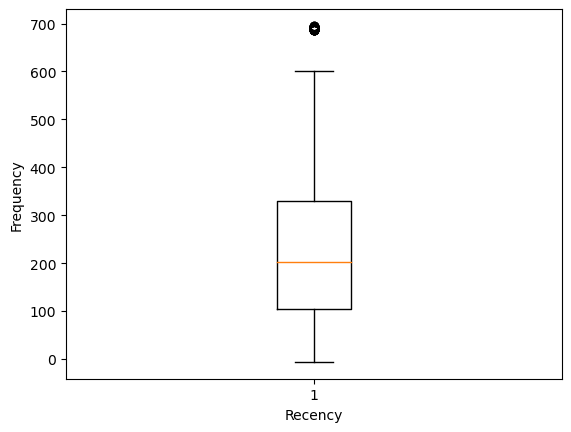

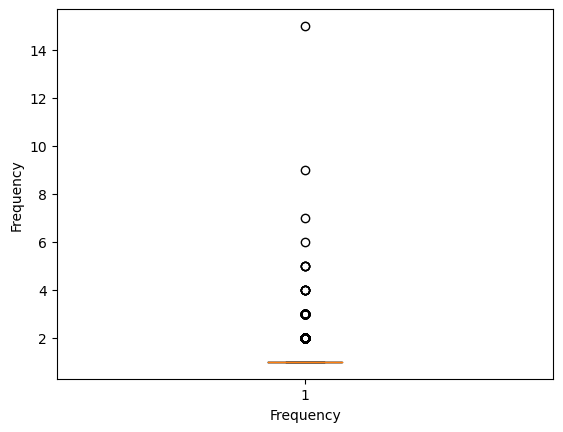

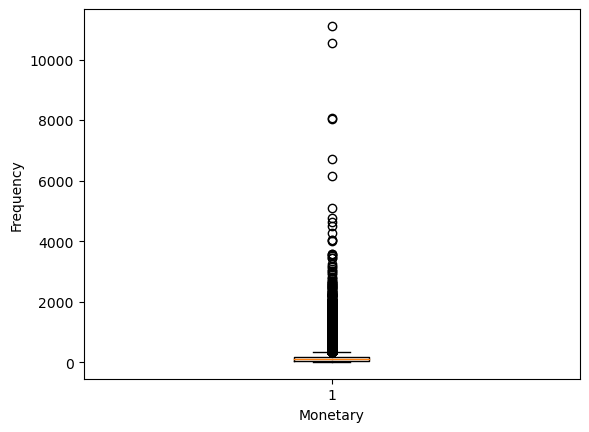

In [28]:
for i in ['Recency', 'Frequency', 'Monetary']:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel=i, ylabel='Frequency')
    plt.boxplot(rfm_final[i])

### 각 컬럼 outlier 제거하기

In [102]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [103]:
for i in ["Recency", "Monetary"]:
    num_outlier(rfm_final, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Monetary column:  375
Indexes:  Int64Index([  116,   188,   197,   198,   251,   269,   438,   490,   588,
              781,
            ...
            38265, 38266, 38614, 38907, 38971, 39008, 39041, 39071, 39084,
            39106],
           dtype='int64', length=375)
****************************************


In [104]:
rfm_final.shape

(39192, 6)

In [105]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [106]:
for i in ["Recency", "Monetary"]:
    remove_outlier(rfm_final, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [107]:
rfm_final.shape

(38817, 6)

In [108]:
rfm_final2 = rfm_final.copy()
rfm_final2 = rfm_final2.set_index('customer_unique_id')
rfm_final2

index order_purchase_timestamp  Recency  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2      0      2018-05-10 10:56:27      110   
0000b849f77a49e4a4ce2b2a4ca5be3f      1      2018-05-07 11:11:27      113   
0004aac84e0df4da2b147fca70cf8255      2      2017-11-14 19:45:42      287   
0004bd2a26a76fe21f786e4fbd80607f      3      2018-04-05 19:33:16      145   
00050ab1314c0e55a6ca13cf7181fecf      4      2018-04-20 12:57:23      130   
...                                 ...                      ...      ...   
ffedff0547d809c90c05c2691c51f9b7  39187      2017-03-30 14:50:26      516   
ffee94d548cef05b146d825a7648dab4  39188      2018-07-27 22:40:35       32   
fff22793223fe80c97a8fd02ac5c6295  39189      2018-06-26 11:01:47       63   
fff699c184bcc967d62fa2c6171765f7  39190      2017-09-01 17:06:54      361   
fff96bc586f78b1f070da28c4977e810  39191      2018-08-15 10:26:57       13   

                                  Frequency  Monetary  
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2          1    141.90  
0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19  
0004aac84e0df4da2b147fca70cf8255          1    196.89  
0004bd2a26a76fe21f786e4fbd80607f          1    166.98  
00050ab1314c0e55a6ca13cf7181fecf          1     35.38  
...                                     ...       ...  
ffedff0547d809c90c05c2691c51f9b7          1     32.42  
ffee94d548cef05b146d825a7648dab4          1     35.36  
fff22793223fe80c97a8fd02ac5c6295          1     89.19  
fff699c184bcc967d62fa2c6171765f7          1     55.00  
fff96bc586f78b1f070da28c4977e810          1     63.42  

[38817 rows x 5 columns]

### RFM 각 분야 segmentation 진행 

In [109]:
# R, F, M 같은 갯수로 같은 비율  나누기 
# qcut : label 5 등급으로 나누기  

In [110]:
rfm_final2["recency_score"]  = pd.qcut(rfm_final2['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_final2["frequency_score"]= pd.qcut(rfm_final2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_final2["monetary_score"] = pd.qcut(rfm_final2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [111]:
rfm_final2['rfm_score'] = rfm_final2.recency_score.astype(str)+ rfm_final2.frequency_score.astype(str) + rfm_final2.monetary_score.astype(str)
rfm_final2

index order_purchase_timestamp  Recency  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2      0      2018-05-10 10:56:27      110   
0000b849f77a49e4a4ce2b2a4ca5be3f      1      2018-05-07 11:11:27      113   
0004aac84e0df4da2b147fca70cf8255      2      2017-11-14 19:45:42      287   
0004bd2a26a76fe21f786e4fbd80607f      3      2018-04-05 19:33:16      145   
00050ab1314c0e55a6ca13cf7181fecf      4      2018-04-20 12:57:23      130   
...                                 ...                      ...      ...   
ffedff0547d809c90c05c2691c51f9b7  39187      2017-03-30 14:50:26      516   
ffee94d548cef05b146d825a7648dab4  39188      2018-07-27 22:40:35       32   
fff22793223fe80c97a8fd02ac5c6295  39189      2018-06-26 11:01:47       63   
fff699c184bcc967d62fa2c6171765f7  39190      2017-09-01 17:06:54      361   
fff96bc586f78b1f070da28c4977e810  39191      2018-08-15 10:26:57       13   

                                  Frequency  Monetary recency_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2          1    141.90             4   
0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19             4   
0004aac84e0df4da2b147fca70cf8255          1    196.89             2   
0004bd2a26a76fe21f786e4fbd80607f          1    166.98             4   
00050ab1314c0e55a6ca13cf7181fecf          1     35.38             4   
...                                     ...       ...           ...   
ffedff0547d809c90c05c2691c51f9b7          1     32.42             1   
ffee94d548cef05b146d825a7648dab4          1     35.36             5   
fff22793223fe80c97a8fd02ac5c6295          1     89.19             5   
fff699c184bcc967d62fa2c6171765f7          1     55.00             2   
fff96bc586f78b1f070da28c4977e810          1     63.42             5   

                                 frequency_score monetary_score rfm_score  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2               1              4       414  
0000b849f77a49e4a4ce2b2a4ca5be3f               1              1       411  
0004aac84e0df4da2b147fca70cf8255               1              5       215  
0004bd2a26a76fe21f786e4fbd80607f               1              4       414  
00050ab1314c0e55a6ca13cf7181fecf               1              1       411  
...                                          ...            ...       ...  
ffedff0547d809c90c05c2691c51f9b7               5              1       151  
ffee94d548cef05b146d825a7648dab4               5              1       551  
fff22793223fe80c97a8fd02ac5c6295               5              3       553  
fff699c184bcc967d62fa2c6171765f7               5              2       252  
fff96bc586f78b1f070da28c4977e810               5              2       552  

[38817 rows x 9 columns]

In [112]:
# RFM 스코어 가중치 없이 산출 : Recency * 가중치 1 + Frequency * 가중치 1 + Monetary * 가중치 1

# EX) RMF_SCORE : 151 , 553, 252, 552
# 상기 SCORE는 고객 SEGMENTATION 하기 위해 산출한 것 

In [113]:
rfm_final2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38817 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to fff96bc586f78b1f070da28c4977e810
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     38817 non-null  int64         
 1   order_purchase_timestamp  38817 non-null  datetime64[ns]
 2   Recency                   38817 non-null  int64         
 3   Frequency                 38817 non-null  int64         
 4   Monetary                  38817 non-null  float64       
 5   recency_score             38817 non-null  category      
 6   frequency_score           38817 non-null  category      
 7   monetary_score            38817 non-null  category      
 8   rfm_score                 38817 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.2+ MB


In [114]:
rfm_final2 = rfm_final2.astype({'recency_score':'int'})
rfm_final2 = rfm_final2.astype({'frequency_score':'int'})
rfm_final2 = rfm_final2.astype({'monetary_score':'int'})

In [115]:
rfm_final2

index order_purchase_timestamp  Recency  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2      0      2018-05-10 10:56:27      110   
0000b849f77a49e4a4ce2b2a4ca5be3f      1      2018-05-07 11:11:27      113   
0004aac84e0df4da2b147fca70cf8255      2      2017-11-14 19:45:42      287   
0004bd2a26a76fe21f786e4fbd80607f      3      2018-04-05 19:33:16      145   
00050ab1314c0e55a6ca13cf7181fecf      4      2018-04-20 12:57:23      130   
...                                 ...                      ...      ...   
ffedff0547d809c90c05c2691c51f9b7  39187      2017-03-30 14:50:26      516   
ffee94d548cef05b146d825a7648dab4  39188      2018-07-27 22:40:35       32   
fff22793223fe80c97a8fd02ac5c6295  39189      2018-06-26 11:01:47       63   
fff699c184bcc967d62fa2c6171765f7  39190      2017-09-01 17:06:54      361   
fff96bc586f78b1f070da28c4977e810  39191      2018-08-15 10:26:57       13   

                                  Frequency  Monetary  recency_score  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2          1    141.90              4   
0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19              4   
0004aac84e0df4da2b147fca70cf8255          1    196.89              2   
0004bd2a26a76fe21f786e4fbd80607f          1    166.98              4   
00050ab1314c0e55a6ca13cf7181fecf          1     35.38              4   
...                                     ...       ...            ...   
ffedff0547d809c90c05c2691c51f9b7          1     32.42              1   
ffee94d548cef05b146d825a7648dab4          1     35.36              5   
fff22793223fe80c97a8fd02ac5c6295          1     89.19              5   
fff699c184bcc967d62fa2c6171765f7          1     55.00              2   
fff96bc586f78b1f070da28c4977e810          1     63.42              5   

                                  frequency_score  monetary_score rfm_score  
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2                1               4       414  
0000b849f77a49e4a4ce2b2a4ca5be3f                1               1       411  
0004aac84e0df4da2b147fca70cf8255                1               5       215  
0004bd2a26a76fe21f786e4fbd80607f                1               4       414  
00050ab1314c0e55a6ca13cf7181fecf                1               1       411  
...                                           ...             ...       ...  
ffedff0547d809c90c05c2691c51f9b7                5               1       151  
ffee94d548cef05b146d825a7648dab4                5               1       551  
fff22793223fe80c97a8fd02ac5c6295                5               3       553  
fff699c184bcc967d62fa2c6171765f7                5               2       252  
fff96bc586f78b1f070da28c4977e810                5               2       552  

[38817 rows x 9 columns]

In [116]:
# source from url : https://documentation.bloomreach.com/engagement/docs/rfm-segmentation 

seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [117]:
rfm_final2['segment'] = rfm_final2['recency_score'].astype(str) + rfm_final2['frequency_score'].astype(str) + rfm_final2['monetary_score'].astype(str)
rfm_final2['segment'] = rfm_final2['segment'].replace(seg_map, regex=True)
rfm_final2.head()

index order_purchase_timestamp  Recency  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2      0      2018-05-10 10:56:27      110   
0000b849f77a49e4a4ce2b2a4ca5be3f      1      2018-05-07 11:11:27      113   
0004aac84e0df4da2b147fca70cf8255      2      2017-11-14 19:45:42      287   
0004bd2a26a76fe21f786e4fbd80607f      3      2018-04-05 19:33:16      145   
00050ab1314c0e55a6ca13cf7181fecf      4      2018-04-20 12:57:23      130   

                                  Frequency  Monetary  recency_score  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2          1    141.90              4   
0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19              4   
0004aac84e0df4da2b147fca70cf8255          1    196.89              2   
0004bd2a26a76fe21f786e4fbd80607f          1    166.98              4   
00050ab1314c0e55a6ca13cf7181fecf          1     35.38              4   

                                  frequency_score  monetary_score rfm_score  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                1               4       414   
0000b849f77a49e4a4ce2b2a4ca5be3f                1               1       411   
0004aac84e0df4da2b147fca70cf8255                1               5       215   
0004bd2a26a76fe21f786e4fbd80607f                1               4       414   
00050ab1314c0e55a6ca13cf7181fecf                1               1       411   

                                           segment  
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2         Promising  
0000b849f77a49e4a4ce2b2a4ca5be3f     New Customers  
0004aac84e0df4da2b147fca70cf8255  Cannot Lose Them  
0004bd2a26a76fe21f786e4fbd80607f         Promising  
00050ab1314c0e55a6ca13cf7181fecf     New Customers

In [118]:
rfm_final2['segment'].unique()

array(['Promising', 'New Customers', 'Cannot Lose Them', 'About To Sleep',
       'Lost customers', 'Hibernating customers', 'Champions',
       'Potential Loyalist', 'Loyal', 'At Risk', 'Need Attention'],
      dtype=object)

In [119]:
rfm_final2['segment'].nunique()

11

### 고객 segment 별 R, F, M describe

In [120]:
rfm_stats = rfm_final2[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])
rfm_stats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep         262.356032  269.0  162  370  2379  1.000420    1.0   1   
At Risk                373.063827  352.0  254  694  6737  1.039187    1.0   1   
Cannot Lose Them       424.842526  425.0  254  695  2502  1.065148    1.0   1   
Champions               76.158558   75.0   -6  161  2302  1.214162    1.0   1   
Hibernating customers  331.266364  311.0  162  693  3529  1.000000    1.0   1   
Lost customers         466.622591  460.0  371  694  1868  1.001606    1.0   1   
Loyal                  162.805976  178.0   -1  253  2577  1.091191    1.0   1   
Need Attention         145.053930  162.0    0  253  2392  1.000000    1.0   1   
New Customers          109.873395  113.0   -1  253  2259  1.000000    1.0   1   
Potential Loyalist     117.014510  116.0   -1  253  7374  1.017358    1.0   1   
Promising               95.225194   80.0   -1  253  4898  1.000000    1.0   1   

                                   Monetary                                 
                      max count        mean  median     min      max count  
segment                                                                     
About To Sleep          2  2379   46.271782   39.10   10.07   119.32  2379  
At Risk                 3  6737  187.393556  139.17   49.00  1077.41  6737  
Cannot Lose Them        3  2502  222.586487  168.78   79.09  1057.29  2502  
Champions              15  2302  269.305678  209.53  119.37  1050.00  2302  
Hibernating customers   1  3529   70.567098   67.62   11.63   119.34  3529  
Lost customers          2  1868   40.169898   38.21   12.28    78.46  1868  
Loyal                   6  2577  245.468960  189.97   78.60  1068.05  2577  
Need Attention          1  2392  185.358069  147.65   78.62  1039.74  2392  
New Customers           1  2259   46.568676   45.39   13.29    78.44  2259  
Potential Loyalist      3  7374   65.280236   62.69   10.89   119.34  7374  
Promising               1  4898  182.793671  140.03   14.06  1075.74  4898

### OLIST 내 고객 segment 별 비중 확인 ['Ratio'] 

In [121]:
rfm_stats['Ratio']= (100*rfm_stats['Monetary']["count"]/rfm_stats['Monetary']["count"].sum()).round(2)
rfm_stats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep         262.356032  269.0  162  370  2379  1.000420    1.0   1   
At Risk                373.063827  352.0  254  694  6737  1.039187    1.0   1   
Cannot Lose Them       424.842526  425.0  254  695  2502  1.065148    1.0   1   
Champions               76.158558   75.0   -6  161  2302  1.214162    1.0   1   
Hibernating customers  331.266364  311.0  162  693  3529  1.000000    1.0   1   
Lost customers         466.622591  460.0  371  694  1868  1.001606    1.0   1   
Loyal                  162.805976  178.0   -1  253  2577  1.091191    1.0   1   
Need Attention         145.053930  162.0    0  253  2392  1.000000    1.0   1   
New Customers          109.873395  113.0   -1  253  2259  1.000000    1.0   1   
Potential Loyalist     117.014510  116.0   -1  253  7374  1.017358    1.0   1   
Promising               95.225194   80.0   -1  253  4898  1.000000    1.0   1   

                                   Monetary                                 \
                      max count        mean  median     min      max count   
segment                                                                      
About To Sleep          2  2379   46.271782   39.10   10.07   119.32  2379   
At Risk                 3  6737  187.393556  139.17   49.00  1077.41  6737   
Cannot Lose Them        3  2502  222.586487  168.78   79.09  1057.29  2502   
Champions              15  2302  269.305678  209.53  119.37  1050.00  2302   
Hibernating customers   1  3529   70.567098   67.62   11.63   119.34  3529   
Lost customers          2  1868   40.169898   38.21   12.28    78.46  1868   
Loyal                   6  2577  245.468960  189.97   78.60  1068.05  2577   
Need Attention          1  2392  185.358069  147.65   78.62  1039.74  2392   
New Customers           1  2259   46.568676   45.39   13.29    78.44  2259   
Potential Loyalist      3  7374   65.280236   62.69   10.89   119.34  7374   
Promising               1  4898  182.793671  140.03   14.06  1075.74  4898   

                       Ratio  
                              
segment                       
About To Sleep          6.13  
At Risk                17.36  
Cannot Lose Them        6.45  
Champions               5.93  
Hibernating customers   9.09  
Lost customers          4.81  
Loyal                   6.64  
Need Attention          6.16  
New Customers           5.82  
Potential Loyalist     19.00  
Promising              12.62

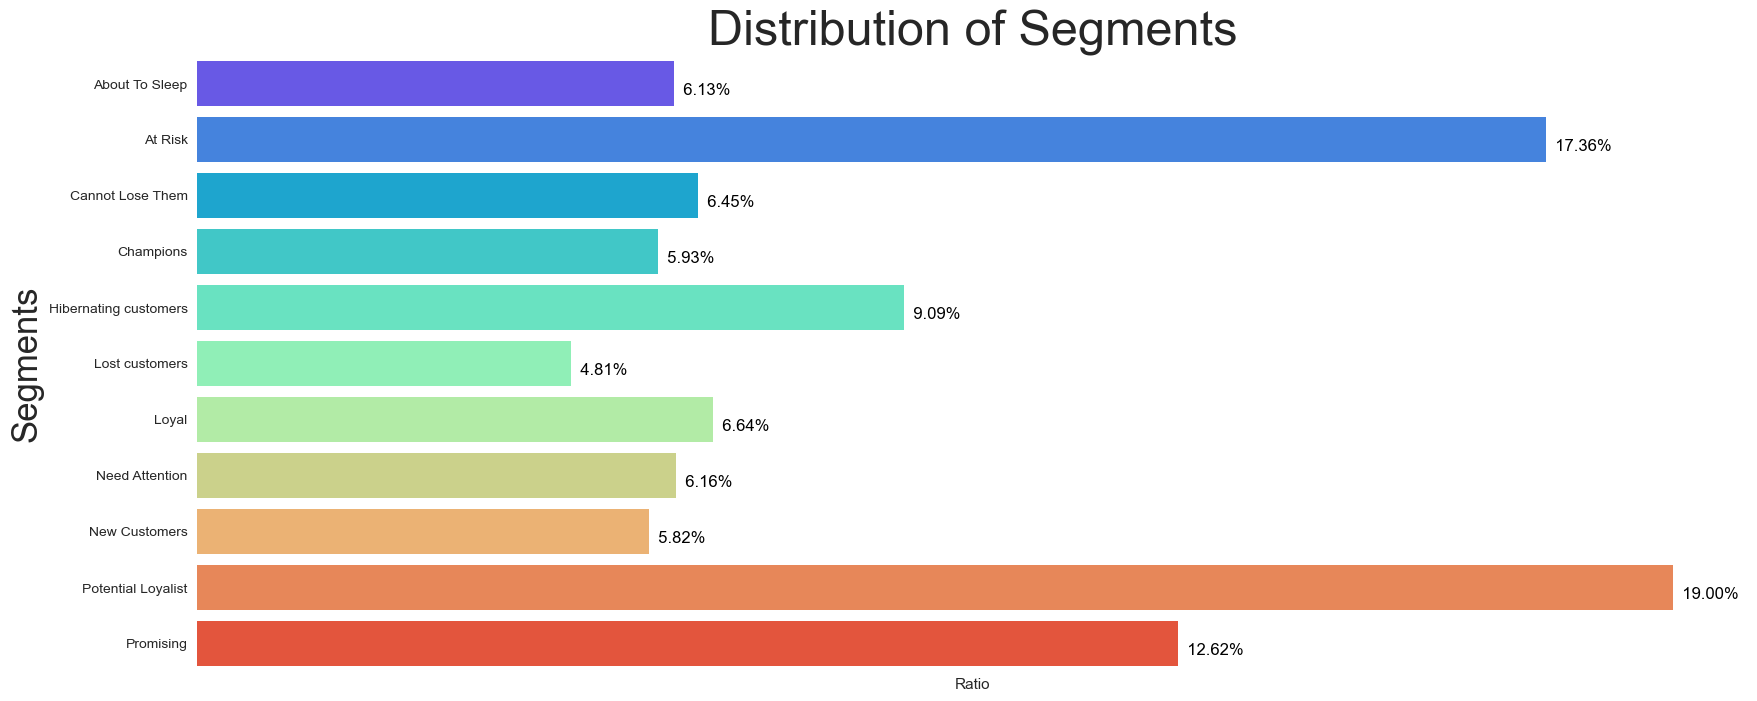

In [122]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=rfm_stats['Ratio'], y=rfm_stats.index, data=rfm_stats, palette="rainbow")
sns.despine(bottom = True, left = True)
for i, v in enumerate(rfm_stats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

* About to Sleep : 
* At Risk : 
* Cannot Lose Them : 
* Champions : 
* Hibernating Customers : 
* Loyal : 
* Need Attention : 
* New Customers : 
* Potential Loyalist : 
* Promising : 

In [123]:
!pip install squarify
import squarify

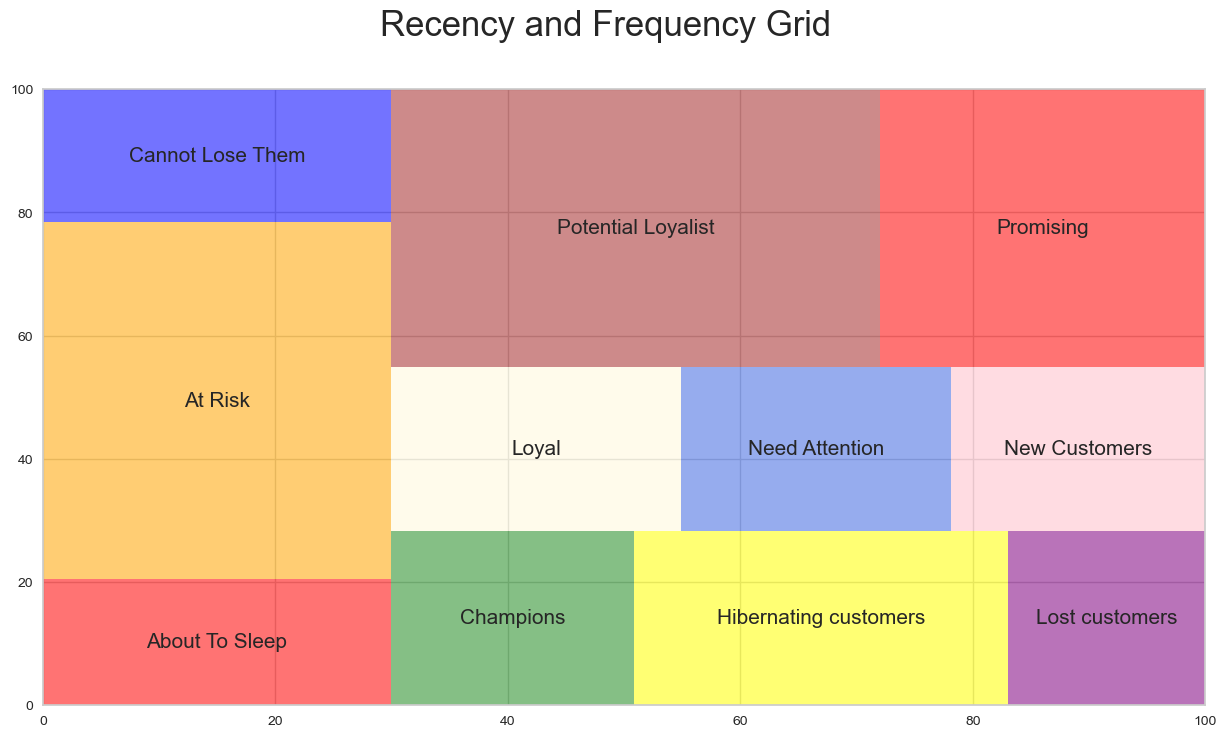

In [124]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=rfm_stats["Recency"]["count"], label=rfm_stats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25);

# 고객 Segmentation 방법 2

### RFM score 직접 구하기

* RFM score = a * R(Recency) + bF(Frequency) + cM(Monetary)

* a,b,c 최적의 가중치를 직접 구해서 부여된 RFM_SCORE를 구해보자

In [125]:
rfm_final3 = rfm_final2.reset_index()
rfm_final3

customer_unique_id  index order_purchase_timestamp  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0      2018-05-10 10:56:27   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      1      2018-05-07 11:11:27   
2      0004aac84e0df4da2b147fca70cf8255      2      2017-11-14 19:45:42   
3      0004bd2a26a76fe21f786e4fbd80607f      3      2018-04-05 19:33:16   
4      00050ab1314c0e55a6ca13cf7181fecf      4      2018-04-20 12:57:23   
...                                 ...    ...                      ...   
38812  ffedff0547d809c90c05c2691c51f9b7  39187      2017-03-30 14:50:26   
38813  ffee94d548cef05b146d825a7648dab4  39188      2018-07-27 22:40:35   
38814  fff22793223fe80c97a8fd02ac5c6295  39189      2018-06-26 11:01:47   
38815  fff699c184bcc967d62fa2c6171765f7  39190      2017-09-01 17:06:54   
38816  fff96bc586f78b1f070da28c4977e810  39191      2018-08-15 10:26:57   

       Recency  Frequency  Monetary  recency_score  frequency_score  \
0          110          1    141.90              4                1   
1          113          1     27.19              4                1   
2          287          1    196.89              2                1   
3          145          1    166.98              4                1   
4          130          1     35.38              4                1   
...        ...        ...       ...            ...              ...   
38812      516          1     32.42              1                5   
38813       32          1     35.36              5                5   
38814       63          1     89.19              5                5   
38815      361          1     55.00              2                5   
38816       13          1     63.42              5                5   

       monetary_score rfm_score             segment  
0                   4       414           Promising  
1                   1       411       New Customers  
2                   5       215    Cannot Lose Them  
3                   4       414           Promising  
4                   1       411       New Customers  
...               ...       ...                 ...  
38812               1       151      Lost customers  
38813               1       551  Potential Loyalist  
38814               3       553  Potential Loyalist  
38815               2       252             At Risk  
38816               2       552  Potential Loyalist  

[38817 rows x 11 columns]

In [126]:
rfm_final_scale = rfm_final3[['customer_unique_id', 'Recency', 'Frequency', 'Monetary']]
rfm_final_scale

customer_unique_id  Recency  Frequency  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19
2      0004aac84e0df4da2b147fca70cf8255      287          1    196.89
3      0004bd2a26a76fe21f786e4fbd80607f      145          1    166.98
4      00050ab1314c0e55a6ca13cf7181fecf      130          1     35.38
...                                 ...      ...        ...       ...
38812  ffedff0547d809c90c05c2691c51f9b7      516          1     32.42
38813  ffee94d548cef05b146d825a7648dab4       32          1     35.36
38814  fff22793223fe80c97a8fd02ac5c6295       63          1     89.19
38815  fff699c184bcc967d62fa2c6171765f7      361          1     55.00
38816  fff96bc586f78b1f070da28c4977e810       13          1     63.42

[38817 rows x 4 columns]

In [127]:
# rfm_final_scale = rfm_final_scale.set_index('order_purchase_timestamp')

In [128]:
# del rfm_final_scale['index'] 
del rfm_final_scale['customer_unique_id'] 

### MinmaxScaler로 R, F, M Normalization 

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

rfm_final_scaled= scaler.fit_transform(rfm_final_scale)
rfm_final_scaled_df= pd.DataFrame(rfm_final_scaled)
rfm_final_scaled_df.columns = ['recency', 'frequency', 'monetary']
rfm_final_scaled_df

recency  frequency  monetary
0      0.165478        0.0  0.123513
1      0.169757        0.0  0.016040
2      0.417974        0.0  0.175033
3      0.215407        0.0  0.147010
4      0.194009        0.0  0.023713
...         ...        ...       ...
38812  0.744650        0.0  0.020940
38813  0.054208        0.0  0.023694
38814  0.098431        0.0  0.074128
38815  0.523538        0.0  0.042095
38816  0.027104        0.0  0.049984

[38817 rows x 3 columns]

### Normalization 된 r,f,m 데이터들을 가지고 군집화 모델링 

- k-means 사용 
- clustering 나누는 기준 KElbowVIsualizer 통해 확인  (6집단으로 확인)
- clustering 나누는 기준 평가 지표 Silhouette score 확인

In [130]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

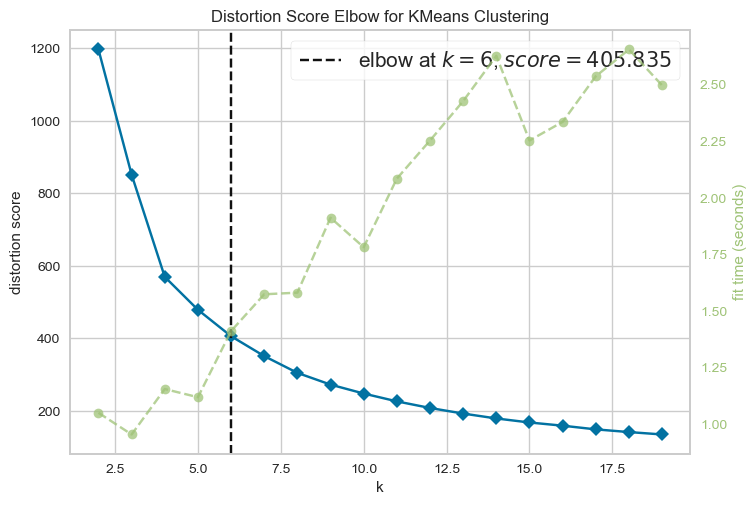

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
k_means = KMeans(n_clusters=5, max_iter=50)
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(rfm_final_scaled_df)
elbow.show()

In [133]:
centers = kmeans.cluster_centers_
centers

array([[0.69351293, 0.00167473, 0.10779585],
       [0.2000213 , 0.00837404, 0.31325789],
       [0.45396457, 0.00181968, 0.0952416 ],
       [0.37357742, 0.01056561, 0.6511949 ],
       [0.26735727, 0.00139218, 0.07843504],
       [0.09078002, 0.00158951, 0.08110735]])

In [132]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(rfm_final_scaled_df)

KMeans(n_clusters=6)

In [135]:
# clustering label 부여하기 

rfm_final_scaled_df['Cluster']= kmeans.labels_
rfm_final_scaled_df = rfm_final_scaled_df.reset_index()
rfm_final_scaled_df

index   recency  frequency  monetary  Cluster
0          0  0.165478        0.0  0.123513        5
1          1  0.169757        0.0  0.016040        5
2          2  0.417974        0.0  0.175033        2
3          3  0.215407        0.0  0.147010        4
4          4  0.194009        0.0  0.023713        4
...      ...       ...        ...       ...      ...
38812  38812  0.744650        0.0  0.020940        0
38813  38813  0.054208        0.0  0.023694        5
38814  38814  0.098431        0.0  0.074128        5
38815  38815  0.523538        0.0  0.042095        2
38816  38816  0.027104        0.0  0.049984        5

[38817 rows x 5 columns]

### Silhouette score

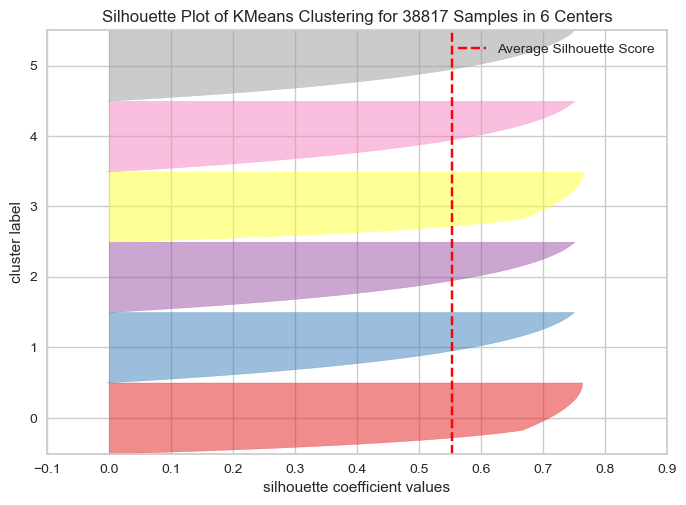

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 38817 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [136]:
from yellowbrick.cluster import SilhouetteVisualizer

vis=SilhouetteVisualizer(KMeans(n_clusters=6,n_init=5, random_state=1))
vis.fit(rfm_final_scaled_df)
vis.show()

#### 각 집단의 silhouette values 가 1에 가까우면 적절한 군집화가 되었다는 의미 

In [137]:
rfm_final_scale = rfm_final_scale.reset_index()
rfm_final_scale

index  Recency  Frequency  Monetary
0          0      110          1    141.90
1          1      113          1     27.19
2          2      287          1    196.89
3          3      145          1    166.98
4          4      130          1     35.38
...      ...      ...        ...       ...
38812  38812      516          1     32.42
38813  38813       32          1     35.36
38814  38814       63          1     89.19
38815  38815      361          1     55.00
38816  38816       13          1     63.42

[38817 rows x 4 columns]

In [138]:
rfm_final_scaled_df['Cluster'].value_counts()

5    10064
4     9705
2     8831
0     6227
1     2862
3     1128
Name: Cluster, dtype: int64

In [139]:
rfm_final_scaled_df_pivot = rfm_final_scaled_df.pivot_table(index='Cluster', values=['recency', 'frequency', 'monetary'], aggfunc=['mean', 'std'])
rfm_final_scaled_df_pivot

mean                           std                    
        frequency  monetary   recency frequency  monetary   recency
Cluster                                                            
0        0.001675  0.107796  0.693513  0.010960  0.089492  0.084886
1        0.008461  0.313590  0.200377  0.026936  0.086484  0.104910
2        0.001796  0.095181  0.453958  0.011688  0.069902  0.061620
3        0.010575  0.651381  0.373584  0.044135  0.143291  0.202964
4        0.001391  0.078434  0.267270  0.010134  0.049849  0.051043
5        0.001590  0.081198  0.090736  0.010916  0.052659  0.051085

In [140]:
rfm_pd_merged = pd.merge(rfm_final_scale,rfm_final_scaled_df, on='index')
rfm_pd_merged

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
0          0      110          1    141.90  0.165478        0.0  0.123513   
1          1      113          1     27.19  0.169757        0.0  0.016040   
2          2      287          1    196.89  0.417974        0.0  0.175033   
3          3      145          1    166.98  0.215407        0.0  0.147010   
4          4      130          1     35.38  0.194009        0.0  0.023713   
...      ...      ...        ...       ...       ...        ...       ...   
38812  38812      516          1     32.42  0.744650        0.0  0.020940   
38813  38813       32          1     35.36  0.054208        0.0  0.023694   
38814  38814       63          1     89.19  0.098431        0.0  0.074128   
38815  38815      361          1     55.00  0.523538        0.0  0.042095   
38816  38816       13          1     63.42  0.027104        0.0  0.049984   

       Cluster  
0            5  
1            5  
2            2  
3            4  
4            4  
...        ...  
38812        0  
38813        5  
38814        5  
38815        2  
38816        5  

[38817 rows x 8 columns]

In [141]:
rfm_pd_merged_index = rfm_pd_merged.pivot_table(index='Cluster', values=['Recency', 'Frequency', 'Monetary'], aggfunc=['mean', 'std'])
rfm_pd_merged_index = rfm_pd_merged_index.reset_index()

In [142]:
rfm_pd_merged_index

Cluster      mean                               std                        
          Frequency    Monetary     Recency Frequency    Monetary     Recency
0       0  1.023446  125.124827  480.152561  0.153436   95.518805   59.505375
1       1  1.118449  344.777131  134.464361  0.377100   92.307785   73.542056
2       2  1.025139  111.660777  312.224437  0.163629   74.608972   43.195787
3       3  1.148050  705.315381  255.882092  0.617890  152.940429  142.277904
4       4  1.019474   93.785801  181.356105  0.141872   53.205429   35.781473
5       5  1.022258   96.736235   57.605723  0.152821   56.204648   35.810500

In [143]:
rfm_index = rfm_pd_merged.pivot_table(index='Cluster', values=['recency', 'frequency', 'monetary'], aggfunc=['mean', 'std'])
rfm_index

mean                           std                    
        frequency  monetary   recency frequency  monetary   recency
Cluster                                                            
0        0.001675  0.107796  0.693513  0.010960  0.089492  0.084886
1        0.008461  0.313590  0.200377  0.026936  0.086484  0.104910
2        0.001796  0.095181  0.453958  0.011688  0.069902  0.061620
3        0.010575  0.651381  0.373584  0.044135  0.143291  0.202964
4        0.001391  0.078434  0.267270  0.010134  0.049849  0.051043
5        0.001590  0.081198  0.090736  0.010916  0.052659  0.051085

- K개로 분류된 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV를 산출하고 
CV를 최소로하는 CVrn, CVfn, CVmn을 찾아 전체 CV의 합으로 다시 나누어 w1, w2, w3를 구하고 
모든 가중치의 합을 1로 만들기 위해 w1, w2, w3 각각을 3개를 모두 더한 값으로 나누어 W1, W2, W3를 구하여 최종 가중치로 결정하였다.

In [144]:
rfm_index = rfm_index.reset_index()
rfm_index

Cluster      mean                           std                    
          frequency  monetary   recency frequency  monetary   recency
0       0  0.001675  0.107796  0.693513  0.010960  0.089492  0.084886
1       1  0.008461  0.313590  0.200377  0.026936  0.086484  0.104910
2       2  0.001796  0.095181  0.453958  0.011688  0.069902  0.061620
3       3  0.010575  0.651381  0.373584  0.044135  0.143291  0.202964
4       4  0.001391  0.078434  0.267270  0.010134  0.049849  0.051043
5       5  0.001590  0.081198  0.090736  0.010916  0.052659  0.051085

In [145]:
rfm_pd_merged_index

Cluster      mean                               std                        
          Frequency    Monetary     Recency Frequency    Monetary     Recency
0       0  1.023446  125.124827  480.152561  0.153436   95.518805   59.505375
1       1  1.118449  344.777131  134.464361  0.377100   92.307785   73.542056
2       2  1.025139  111.660777  312.224437  0.163629   74.608972   43.195787
3       3  1.148050  705.315381  255.882092  0.617890  152.940429  142.277904
4       4  1.019474   93.785801  181.356105  0.141872   53.205429   35.781473
5       5  1.022258   96.736235   57.605723  0.152821   56.204648   35.810500

In [146]:
rfm_index.iloc[:,4]

0    0.010960
1    0.026936
2    0.011688
3    0.044135
4    0.010134
5    0.010916
Name: (std, frequency), dtype: float64


K개로 분류된 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV(변동계수) -> [표준편차] / [평균] 를 산출

In [147]:
rfm_pd_merged_index['frequency_cv'] =  rfm_pd_merged_index.iloc[:,4] / rfm_pd_merged_index.iloc[:,1]
rfm_pd_merged_index['monetary_cv'] = rfm_pd_merged_index.iloc[:, 5] / rfm_pd_merged_index.iloc[:, 2] 
rfm_pd_merged_index['recency_cv'] = rfm_pd_merged_index.iloc[:, 6] / rfm_pd_merged_index.iloc[:, 3]
rfm_pd_merged_index

Cluster      mean                               std                          \
          Frequency    Monetary     Recency Frequency    Monetary     Recency   
0       0  1.023446  125.124827  480.152561  0.153436   95.518805   59.505375   
1       1  1.118449  344.777131  134.464361  0.377100   92.307785   73.542056   
2       2  1.025139  111.660777  312.224437  0.163629   74.608972   43.195787   
3       3  1.148050  705.315381  255.882092  0.617890  152.940429  142.277904   
4       4  1.019474   93.785801  181.356105  0.141872   53.205429   35.781473   
5       5  1.022258   96.736235   57.605723  0.152821   56.204648   35.810500   

  frequency_cv monetary_cv recency_cv  
                                       
0     0.149921    0.763388   0.123930  
1     0.337163    0.267732   0.546926  
2     0.159617    0.668175   0.138349  
3     0.538209    0.216840   0.556029  
4     0.139162    0.567308   0.197300  
5     0.149494    0.581009   0.621648

CV를 최소로하는 CVrn, CVfn, CVmn 산출

In [148]:
CVrn = rfm_pd_merged_index.iloc[:, 9].min()
CVfn = rfm_pd_merged_index.iloc[:, 7].min()
CVmn = rfm_pd_merged_index.iloc[:, 8].min()

전체 CV의 합으로 다시 나누어 w1, w2, w3를 구하기

In [149]:
wr = CVrn / rfm_pd_merged_index['recency_cv'].sum()
wf = CVfn / rfm_pd_merged_index['frequency_cv'].sum()
wm = CVmn / rfm_pd_merged_index['monetary_cv'].sum()

wr, wf, wm

(0.05673985146233896, 0.0944389958936619, 0.07075972060650298)

모든 가중치의 합을 1로 만들기 위해 w1, w2, w3
각각을 3개를 모두 더한 값으로 나누어 W1, W2, W3를 구하여 최종 가중치로 결정

In [150]:
WR = wr / (wr + wf + wm)  
WF = wf / (wr + wf + wm)  
WM = wm / (wr + wf + wm)  

WR, WF, WM

(0.2556556617591813, 0.4255186322983629, 0.31882570594245574)

In [151]:
rfm_pd_merged['RFM_SCORE'] = WR * rfm_pd_merged['Recency'] + WF * rfm_pd_merged['Frequency'] + WM * rfm_pd_merged['Monetary']

In [152]:
rfm_pd_merged

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
0          0      110          1    141.90  0.165478        0.0  0.123513   
1          1      113          1     27.19  0.169757        0.0  0.016040   
2          2      287          1    196.89  0.417974        0.0  0.175033   
3          3      145          1    166.98  0.215407        0.0  0.147010   
4          4      130          1     35.38  0.194009        0.0  0.023713   
...      ...      ...        ...       ...       ...        ...       ...   
38812  38812      516          1     32.42  0.744650        0.0  0.020940   
38813  38813       32          1     35.36  0.054208        0.0  0.023694   
38814  38814       63          1     89.19  0.098431        0.0  0.074128   
38815  38815      361          1     55.00  0.523538        0.0  0.042095   
38816  38816       13          1     63.42  0.027104        0.0  0.049984   

       Cluster   RFM_SCORE  
0            5   73.789009  
1            5   37.983479  
2            2  136.572287  
3            4   90.733106  
4            4   44.940808  
...        ...         ...  
38812        0  142.680169  
38813        5   19.880177  
38814        5   44.967890  
38815        2  110.252626  
38816        5   23.968969  

[38817 rows x 9 columns]

In [153]:
rfm_pd_merged['RFM_SCORE'].describe()

count    38817.000000
mean       102.747924
std         59.109774
min          4.725882
25%         60.245971
50%         93.140659
75%        133.898533
max        486.458103
Name: RFM_SCORE, dtype: float64

In [154]:
rfm_final = rfm_final.reset_index()
rfm_final

level_0  index                customer_unique_id  \
0            0      0  0000366f3b9a7992bf8c76cfdf3221e2   
1            1      1  0000b849f77a49e4a4ce2b2a4ca5be3f   
2            2      2  0004aac84e0df4da2b147fca70cf8255   
3            3      3  0004bd2a26a76fe21f786e4fbd80607f   
4            4      4  00050ab1314c0e55a6ca13cf7181fecf   
...        ...    ...                               ...   
38812    39187  39187  ffedff0547d809c90c05c2691c51f9b7   
38813    39188  39188  ffee94d548cef05b146d825a7648dab4   
38814    39189  39189  fff22793223fe80c97a8fd02ac5c6295   
38815    39190  39190  fff699c184bcc967d62fa2c6171765f7   
38816    39191  39191  fff96bc586f78b1f070da28c4977e810   

      order_purchase_timestamp  Recency  Frequency  Monetary  
0          2018-05-10 10:56:27      110          1    141.90  
1          2018-05-07 11:11:27      113          1     27.19  
2          2017-11-14 19:45:42      287          1    196.89  
3          2018-04-05 19:33:16      145          1    166.98  
4          2018-04-20 12:57:23      130          1     35.38  
...                        ...      ...        ...       ...  
38812      2017-03-30 14:50:26      516          1     32.42  
38813      2018-07-27 22:40:35       32          1     35.36  
38814      2018-06-26 11:01:47       63          1     89.19  
38815      2017-09-01 17:06:54      361          1     55.00  
38816      2018-08-15 10:26:57       13          1     63.42  

[38817 rows x 7 columns]

In [155]:
rfm_final_1 = rfm_final[['index', 'customer_unique_id']]
rfm_final_1

index                customer_unique_id
0          0  0000366f3b9a7992bf8c76cfdf3221e2
1          1  0000b849f77a49e4a4ce2b2a4ca5be3f
2          2  0004aac84e0df4da2b147fca70cf8255
3          3  0004bd2a26a76fe21f786e4fbd80607f
4          4  00050ab1314c0e55a6ca13cf7181fecf
...      ...                               ...
38812  39187  ffedff0547d809c90c05c2691c51f9b7
38813  39188  ffee94d548cef05b146d825a7648dab4
38814  39189  fff22793223fe80c97a8fd02ac5c6295
38815  39190  fff699c184bcc967d62fa2c6171765f7
38816  39191  fff96bc586f78b1f070da28c4977e810

[38817 rows x 2 columns]

In [156]:
rfm = pd.merge(rfm_pd_merged, rfm_final_1, on='index')
rfm

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
0          0      110          1    141.90  0.165478        0.0  0.123513   
1          1      113          1     27.19  0.169757        0.0  0.016040   
2          2      287          1    196.89  0.417974        0.0  0.175033   
3          3      145          1    166.98  0.215407        0.0  0.147010   
4          4      130          1     35.38  0.194009        0.0  0.023713   
...      ...      ...        ...       ...       ...        ...       ...   
38444  38812      516          1     32.42  0.744650        0.0  0.020940   
38445  38813       32          1     35.36  0.054208        0.0  0.023694   
38446  38814       63          1     89.19  0.098431        0.0  0.074128   
38447  38815      361          1     55.00  0.523538        0.0  0.042095   
38448  38816       13          1     63.42  0.027104        0.0  0.049984   

       Cluster   RFM_SCORE                customer_unique_id  
0            5   73.789009  0000366f3b9a7992bf8c76cfdf3221e2  
1            5   37.983479  0000b849f77a49e4a4ce2b2a4ca5be3f  
2            2  136.572287  0004aac84e0df4da2b147fca70cf8255  
3            4   90.733106  0004bd2a26a76fe21f786e4fbd80607f  
4            4   44.940808  00050ab1314c0e55a6ca13cf7181fecf  
...        ...         ...                               ...  
38444        0  142.680169  fd85a7641130055820c8a06a919729e0  
38445        5   19.880177  fd8abe602ce8ebd7a043782261cb6cda  
38446        5   44.967890  fd8ae395b4b313a4af523a90a92d6c10  
38447        2  110.252626  fd8cb1bbbf12eb443bc2876331db7cc1  
38448        5   23.968969  fd8d67c9f12ff483d867a15f3cd401f7  

[38449 rows x 10 columns]

In [157]:
centers[:,:]

array([[0.69351293, 0.00167473, 0.10779585],
       [0.2000213 , 0.00837404, 0.31325789],
       [0.45396457, 0.00181968, 0.0952416 ],
       [0.37357742, 0.01056561, 0.6511949 ],
       [0.26735727, 0.00139218, 0.07843504],
       [0.09078002, 0.00158951, 0.08110735]])

In [158]:
rfm

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
0          0      110          1    141.90  0.165478        0.0  0.123513   
1          1      113          1     27.19  0.169757        0.0  0.016040   
2          2      287          1    196.89  0.417974        0.0  0.175033   
3          3      145          1    166.98  0.215407        0.0  0.147010   
4          4      130          1     35.38  0.194009        0.0  0.023713   
...      ...      ...        ...       ...       ...        ...       ...   
38444  38812      516          1     32.42  0.744650        0.0  0.020940   
38445  38813       32          1     35.36  0.054208        0.0  0.023694   
38446  38814       63          1     89.19  0.098431        0.0  0.074128   
38447  38815      361          1     55.00  0.523538        0.0  0.042095   
38448  38816       13          1     63.42  0.027104        0.0  0.049984   

       Cluster   RFM_SCORE                customer_unique_id  
0            5   73.789009  0000366f3b9a7992bf8c76cfdf3221e2  
1            5   37.983479  0000b849f77a49e4a4ce2b2a4ca5be3f  
2            2  136.572287  0004aac84e0df4da2b147fca70cf8255  
3            4   90.733106  0004bd2a26a76fe21f786e4fbd80607f  
4            4   44.940808  00050ab1314c0e55a6ca13cf7181fecf  
...        ...         ...                               ...  
38444        0  142.680169  fd85a7641130055820c8a06a919729e0  
38445        5   19.880177  fd8abe602ce8ebd7a043782261cb6cda  
38446        5   44.967890  fd8ae395b4b313a4af523a90a92d6c10  
38447        2  110.252626  fd8cb1bbbf12eb443bc2876331db7cc1  
38448        5   23.968969  fd8d67c9f12ff483d867a15f3cd401f7  

[38449 rows x 10 columns]

In [159]:
import plotly.express as px

fig= px.scatter_3d(rfm, x='frequency', y='monetary', z='recency', color='Cluster',opacity=0.5)
fig.update_traces(marker_size = 3)
fig.show()

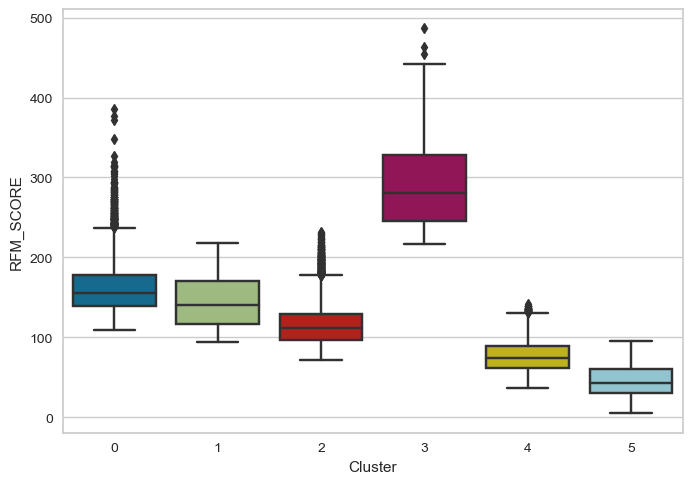

In [160]:
marker0_ind = rfm[rfm['Cluster']==0].index
marker1_ind = rfm[rfm['Cluster']==1].index
marker2_ind = rfm[rfm['Cluster']==2].index
marker3_ind = rfm[rfm['Cluster']==3].index
marker4_ind = rfm[rfm['Cluster']==4].index

sns.boxplot(x='Cluster', y='RFM_SCORE', data=rfm)
plt.show()

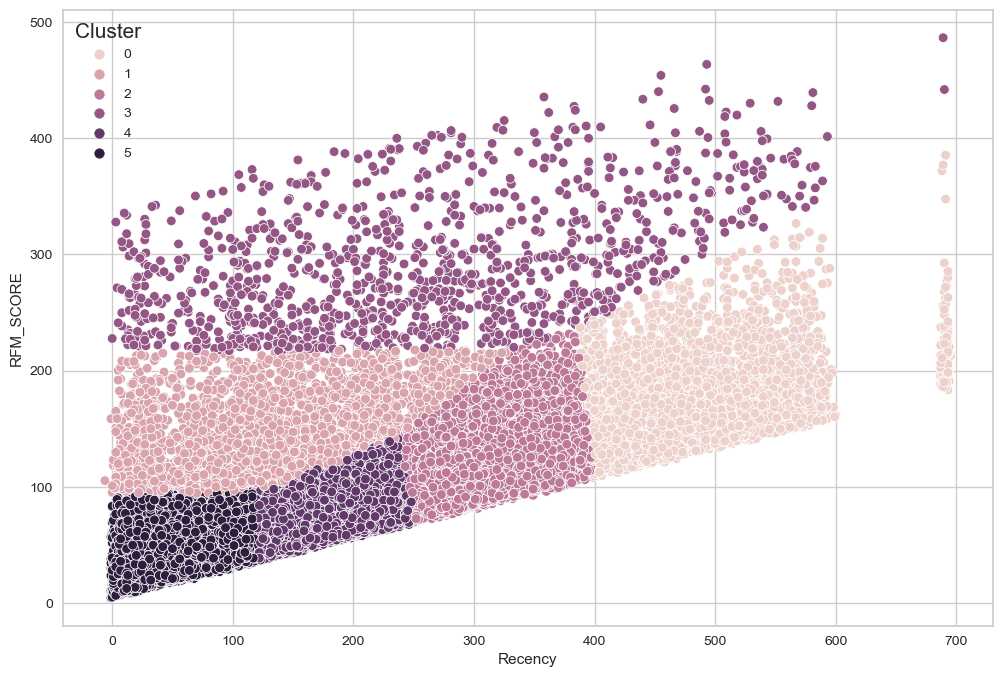

In [161]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Recency', y='RFM_SCORE', data=rfm_pd_merged, hue='Cluster')
plt.show();

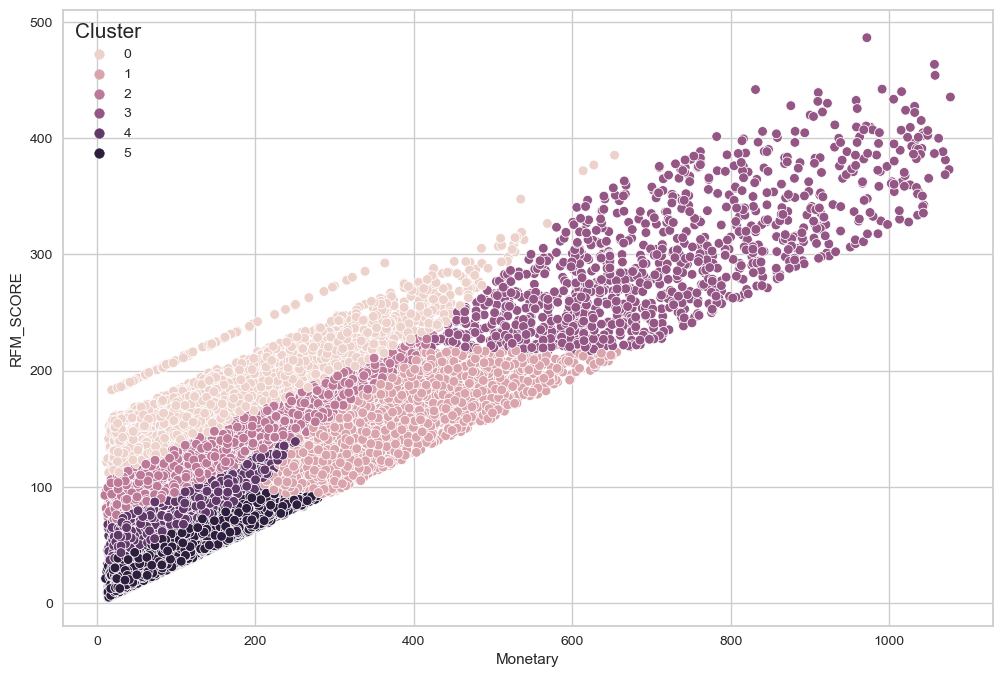

In [162]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Monetary', y='RFM_SCORE', data=rfm_pd_merged, hue='Cluster')
plt.show();

In [163]:
rfm.sort_values(by='Frequency', ascending=False)

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
21234  21431        8         15    820.15  0.019971   1.000000  0.758971   
15199  15346       61          7    758.83  0.095578   0.428571  0.701520   
10878  10985      216          6    997.32  0.316690   0.357143  0.924963   
17639  17810      147          5    494.51  0.218260   0.285714  0.453876   
11875  11992       75          5    490.41  0.115549   0.285714  0.450035   
...      ...      ...        ...       ...       ...        ...       ...   
13003  13130      333          1    126.22  0.483595   0.000000  0.108822   
13004  13131       28          1    195.54  0.048502   0.000000  0.173768   
13005  13132      439          1     75.03  0.634807   0.000000  0.060862   
13006  13133        0          1    260.50  0.008559   0.000000  0.234630   
38448  38816       13          1     63.42  0.027104   0.000000  0.049984   

       Cluster   RFM_SCORE                customer_unique_id  
21234        3  269.912928  8bb00f6a4b2bf731dc04d1af4cfccf1e  
15199        3  260.508136  636f22218f8430a8463c5ddc5f68fc62  
10878        3  375.745988  472a149da00ab76966375b76601af3e3  
17639        1  197.371475  7379b57a7a2b9aa2741a1c564138b99a  
11875        1  177.657082  4daa117393e38a804850e13486899605  
...        ...         ...                               ...  
13003        2  125.801035  54f4544f28cadcb2b350e8c84b260868  
13004        5   69.927056  54f5194ca570ab0f799418851be2b692  
13005        0  136.579847  54f53965480837781ce5908fa0f47a79  
13006        5   83.479615  54fa5bd3c92ef6ed4857894049443b20  
38448        5   23.968969  fd8d67c9f12ff483d867a15f3cd401f7  

[38449 rows x 10 columns]

In [164]:
rfm['Frequency'].value_counts()

1     37286
2      1082
3        68
4         7
5         3
6         1
7         1
15        1
Name: Frequency, dtype: int64

In [165]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'RFM_SCORE' : ['mean','median', 'min', 'max', 'count'],
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [166]:
rfm1= rfm.copy()
rfm1

index  Recency  Frequency  Monetary   recency  frequency  monetary  \
0          0      110          1    141.90  0.165478        0.0  0.123513   
1          1      113          1     27.19  0.169757        0.0  0.016040   
2          2      287          1    196.89  0.417974        0.0  0.175033   
3          3      145          1    166.98  0.215407        0.0  0.147010   
4          4      130          1     35.38  0.194009        0.0  0.023713   
...      ...      ...        ...       ...       ...        ...       ...   
38444  38812      516          1     32.42  0.744650        0.0  0.020940   
38445  38813       32          1     35.36  0.054208        0.0  0.023694   
38446  38814       63          1     89.19  0.098431        0.0  0.074128   
38447  38815      361          1     55.00  0.523538        0.0  0.042095   
38448  38816       13          1     63.42  0.027104        0.0  0.049984   

       Cluster   RFM_SCORE                customer_unique_id  
0            5   73.789009  0000366f3b9a7992bf8c76cfdf3221e2  
1            5   37.983479  0000b849f77a49e4a4ce2b2a4ca5be3f  
2            2  136.572287  0004aac84e0df4da2b147fca70cf8255  
3            4   90.733106  0004bd2a26a76fe21f786e4fbd80607f  
4            4   44.940808  00050ab1314c0e55a6ca13cf7181fecf  
...        ...         ...                               ...  
38444        0  142.680169  fd85a7641130055820c8a06a919729e0  
38445        5   19.880177  fd8abe602ce8ebd7a043782261cb6cda  
38446        5   44.967890  fd8ae395b4b313a4af523a90a92d6c10  
38447        2  110.252626  fd8cb1bbbf12eb443bc2876331db7cc1  
38448        5   23.968969  fd8d67c9f12ff483d867a15f3cd401f7  

[38449 rows x 10 columns]

In [167]:
rfm_clusters_stat(rfm1).style.background_gradient(cmap='YlGnBu')

- 빈도 기능은 대부분의 고객이 평균적으로 한 번만 주문했기 때문에 모델에 많이 추가되지 않음.
- 대부분의 고객은 한동안 주문하지 않음.

In [168]:
RFM_stats_rfm1 = pd.DataFrame(rfm_clusters_stat(rfm1))
RFM_stats_rfm1

RFM_SCORE                            Recency                   \
             mean median    min    max count    mean median  min  max   
Cluster                                                                 
0           163.0  156.0  109.0  385.0  6165   480.0  470.0  388  695   
1           145.0  140.0   94.0  218.0  2831   135.0  131.0   -6  328   
2           116.0  111.0   71.0  232.0  8745   312.0  305.0  241  399   
3           291.0  280.0  217.0  486.0  1117   256.0  251.0    0  690   
4            77.0   74.0   37.0  141.0  9604   181.0  181.0  119  251   
5            46.0   43.0    5.0   96.0  9987    58.0   56.0   -1  120   

        Frequency                Monetary                              
             mean median min max     mean median    min     max count  
Cluster                                                                
0             1.0    1.0   1   3    125.0   97.0   12.0   653.0  6165  
1             1.0    1.0   1   5    345.0  328.0  205.0   656.0  2831  
2             1.0    1.0   1   3    112.0   91.0   10.0   425.0  8745  
3             1.0    1.0   1  15    705.0  680.0  422.0  1077.0  1117  
4             1.0    1.0   1   3     94.0   83.0   13.0   252.0  9604  
5             1.0    1.0   1   3     97.0   85.0   11.0   279.0  9987

### segmentation 2번째 방법 'rfm_score' 기준

Text(0.5, 0.98, 'Segments of Customers')

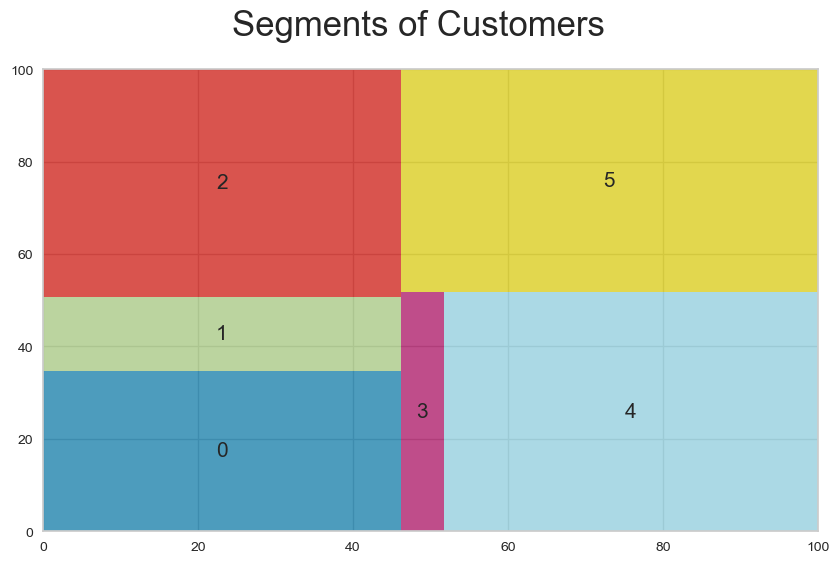

In [169]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats_rfm1["RFM_SCORE"]["count"], label=RFM_stats_rfm1.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)